In [1]:
b = 7
f(x) = b*x
f(6)

42

In [2]:
function updateSIR(popnvector)       # some liberty here: using upper case in the function name
    susceptibles = popnvector[1];
    infecteds    = popnvector[2]; 
    removeds     = popnvector[3];
    newS = susceptibles - lambda*susceptibles*infecteds*dt
    newI = infecteds + lambda*susceptibles*infecteds*dt - gam*infecteds*dt  #note abbreviation for gamma (see below)
    newR = removeds + gam*infecteds*dt
    return [newS newI newR]   # NB! spaces only to make this a one row of a two-dimensional array
    #                   and note the use of "return" to specify what the function output should be 
end 

updateSIR (generic function with 1 method)

In [21]:
# set the values that define the current run
lambda = 1/20000   # infection rate parameter (assumes rates are per day)
gam = 1/10       # recovery rate parameter  (ditto)
dt = 0.5         # length of time step in days
tfinal = 610;    # respecting community values: lowercase only in the names 
s0 = 10000.0     # initial susceptibles, note that we use the  type Float64 from the start
i0 = 4.          # initial infecteds; set this to 1. to  mimic an epidemic with an index case
r0 = 0.          # not always the case, of course

# initialise 
nsteps = round(Int64, tfinal/dt)    # note the use of round() with type Int64 to ensure that nsteps is an integer
resultvals = Array{Float64}(undef, nsteps+1, 3)  #initialise array of type Float64 to hold results
timevec = Array{Float64}(undef, nsteps+1)        # ... ditto for time values
resultvals[1,:] = [s0, i0, r0]  # ... and assign them to the first row
timevec[1] = 0.                 # also Float64, of course.

for step  = 1:nsteps
    resultvals[step+1, :] = updateSIR(resultvals[step, :])  # NB! pay careful attention to the rows being used
    timevec[step+1] = timevec[step] + dt
end

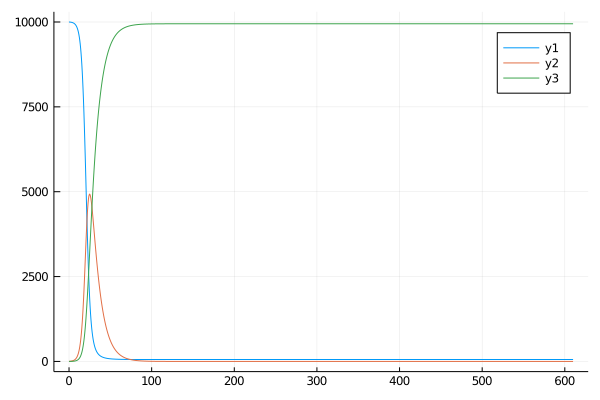

In [22]:
using Plots
gr()
plot(timevec, resultvals)  # quick and dirty! Plots ought to interpret this as we mean it ...

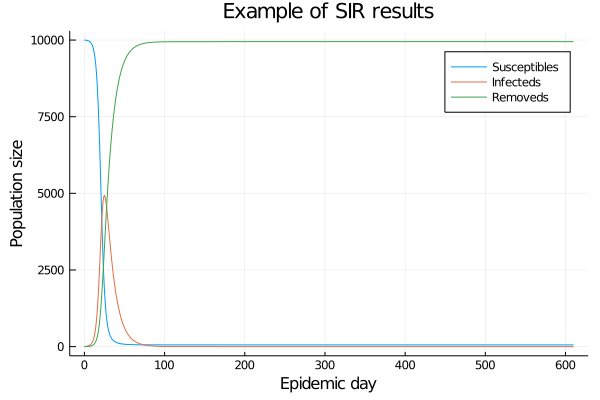

In [23]:
plot(timevec, resultvals,  # we should of course at a minimum provide some labels
title  = "Example of SIR results",
xlabel = "Epidemic day",
ylabel = "Population size",
label  = ["Susceptibles" "Infecteds" "Removeds"]
)

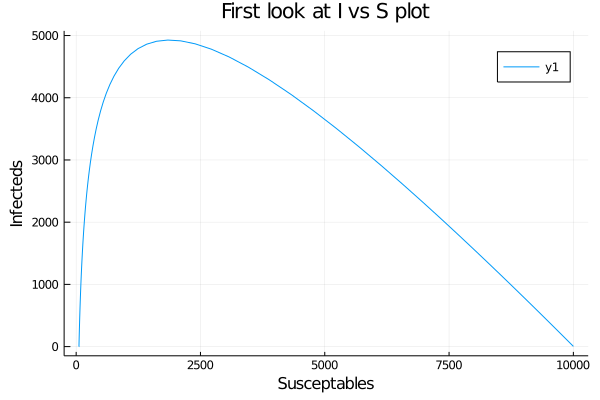

In [24]:
svals = resultvals[:,1]
ivals = resultvals[:,2]
plot(svals, ivals,
    title = "First look at I vs S plot",
    xlabel = "Susceptables",
    ylabel = "Infecteds")

In [25]:
tempvar = Array{Any}(undef, 4)
fill!(tempvar, "hello...World")

4-element Array{Any,1}:
 "hello...World"
 "hello...World"
 "hello...World"
 "hello...World"

In [27]:
fill!(tempvar, π)

4-element Array{Any,1}:
 π = 3.1415926535897...
 π = 3.1415926535897...
 π = 3.1415926535897...
 π = 3.1415926535897...

In [32]:
function approxcos(x)
    outval = Array{Any}(undef, size(x))
    li = 0
    for aa in x
        y = 1 - aa^2/2 + aa^4/24 - aa^6/720 + aa^8/(56*720)
        li = li + 1
        outval[li] = y
    end
    return outval
end

x1 = 4*rand(10)
x2 = range(0., stop = 4, step = 0.01)
y1 = approxcos(x1)
y2 = cos.(x2);

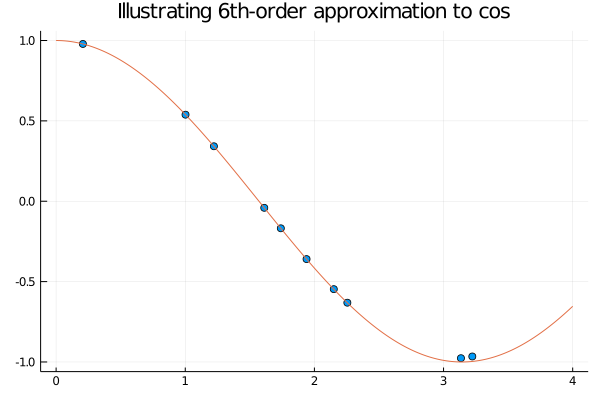

In [33]:
using Plots;
gr()
scatter(x1, y1, legend = false, title = "Illustrating 6th-order approximation to cos")
plot!(x2, y2)